In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [5]:
telecom_cust = pd.read_csv("C:\\Users\\A\\Downloads\\ChurnPrediction\\Churn-Prediction-using-Logistic-Regression-main\\telecom.csv")


In [6]:
telecom_cust.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
print("Rows x Columns ="telecom_cust.shape)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2251890001.py, line 1)

In [8]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
telecom_cust.TotalCharges=pd.to_numeric(telecom_cust.TotalCharges,errors='coerce')
telecom_cust.isnull().sum().values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 11,  0], dtype=int64)

In [11]:
telecom_cust.dropna(inplace=True)
telecom_cust.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### **Data Preparation and Visualisations**

In [12]:
df2=telecom_cust.iloc[:,1:]
df2['Churn'].replace(to_replace="Yes", value=1, inplace=True)
df2['Churn'].replace(to_replace="No",  value=0, inplace=True)

In [13]:
df_dummies=pd.get_dummies(df2)
df_dummies.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
5,0,8,99.65,820.50,1,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,False
6,0,22,89.10,1949.40,0,False,True,True,False,False,...,False,True,False,False,False,True,False,True,False,False
7,0,10,29.75,301.90,0,True,False,True,False,True,...,False,True,False,False,True,False,False,False,False,True
8,0,28,104.80,3046.05,1,True,False,False,True,True,...,True,True,False,False,False,True,False,False,True,False
9,0,62,56.15,3487.95,0,False,True,True,False,False,...,False,False,True,False,True,False,True,False,False,False


<Axes: >

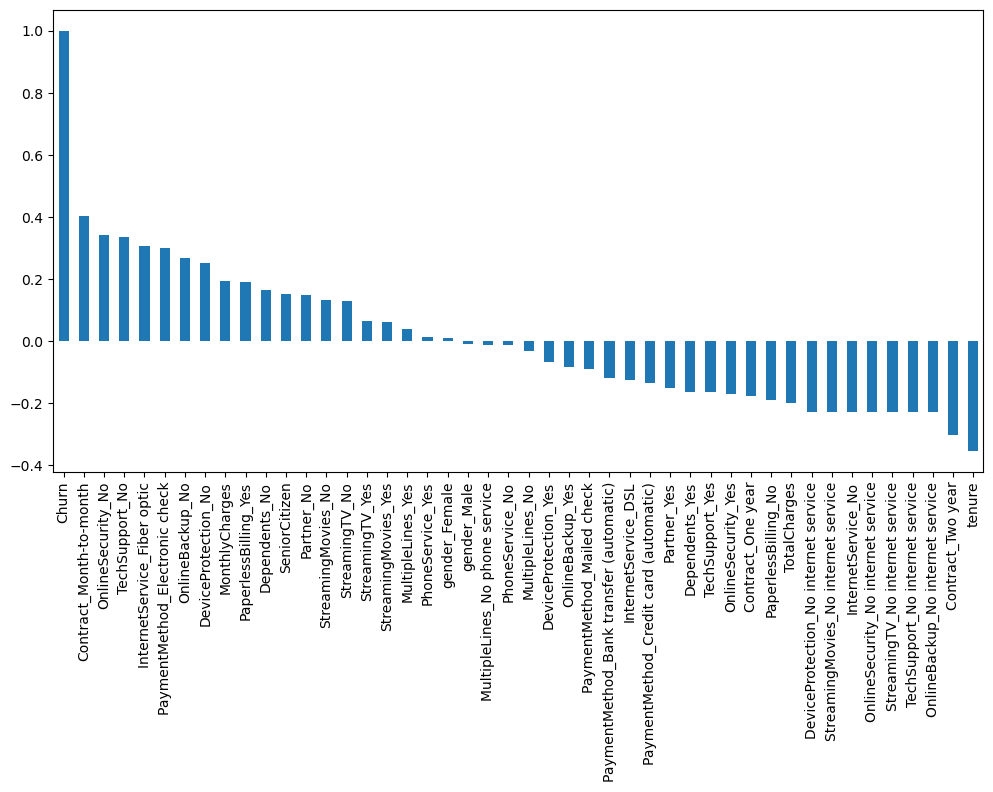

In [14]:
plt.figure(figsize=(12,6))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

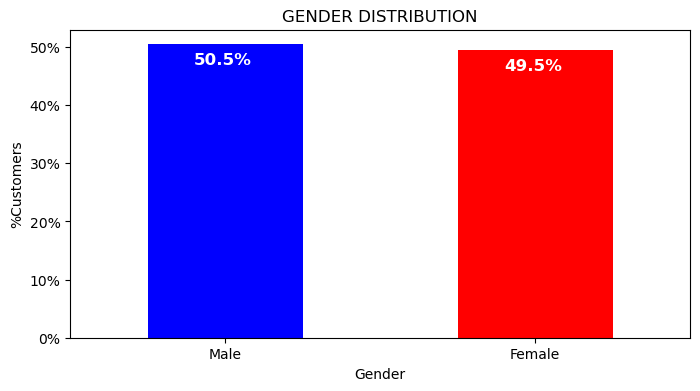

In [15]:
plt.figure(figsize=(8,4))
colors = ["b","r"]
ax = (telecom_cust['gender'].value_counts()*100.0/len(telecom_cust)).plot(kind='bar', stacked=True, rot=0 , color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel("Gender")
ax.set_ylabel("%Customers")
ax.set_title("GENDER DISTRIBUTION")
totals=[]

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

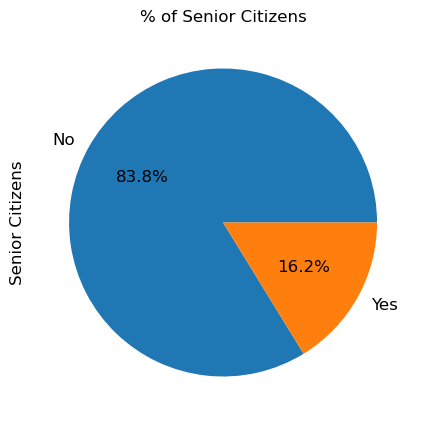

In [16]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, 'No of Customers by Contract Type')

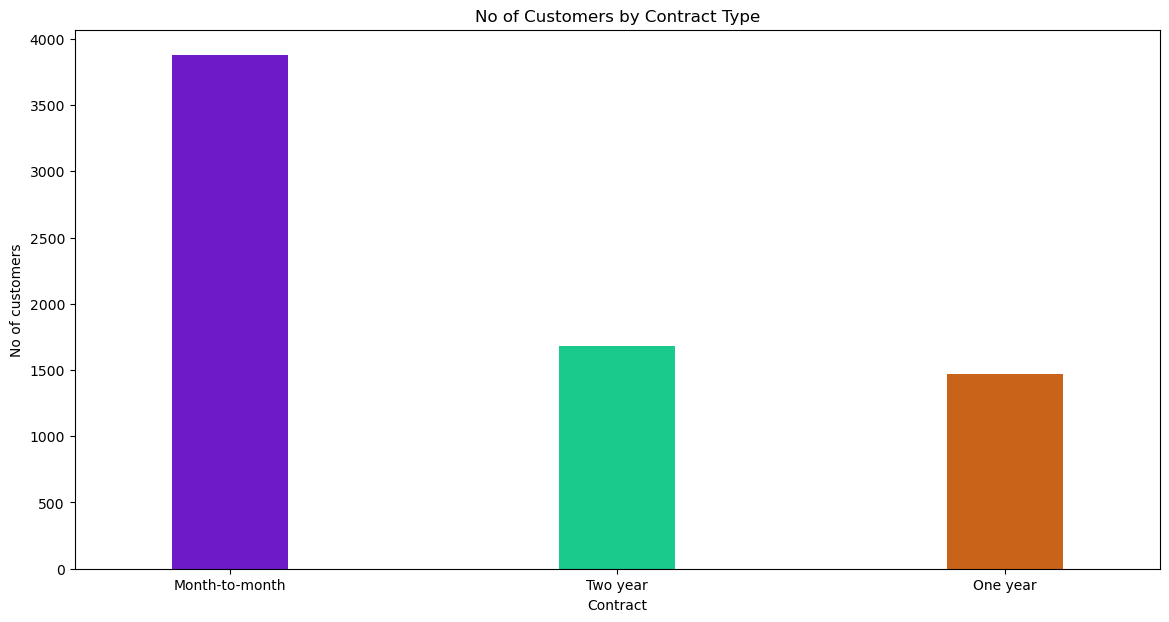

In [17]:
plt.figure(figsize=(14,7))
ax = telecom_cust['Contract'].value_counts().plot(kind= 'bar',rot = 0, width=0.3, color=["#6f1ac9","#1ac98c","#c9631a"])
ax.set_ylabel('No of customers')
ax.set_title('No of Customers by Contract Type')

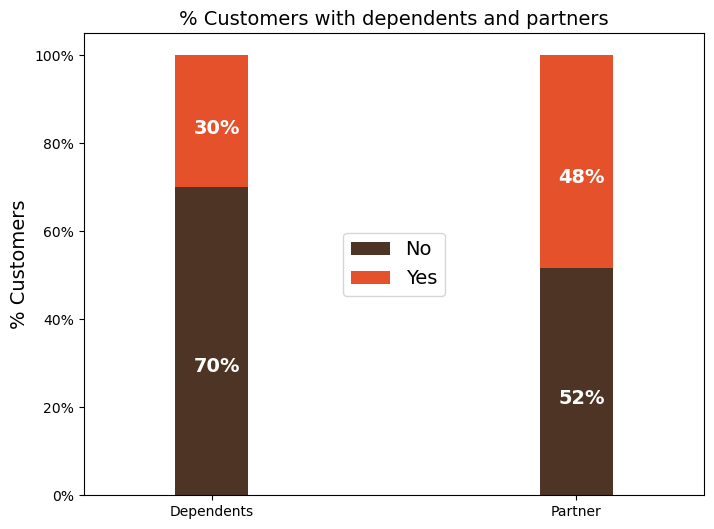

In [18]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
    

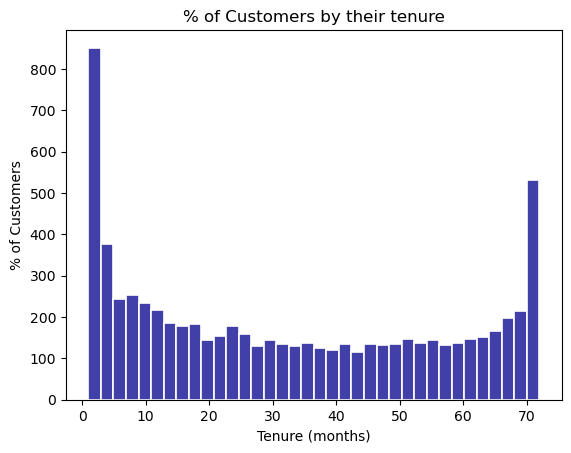

In [19]:
ax = sns.histplot(telecom_cust['tenure'], bins=int(180/5), color='darkblue', edgecolor='white', linewidth=1.2)
ax.set_ylabel('% of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('% of Customers by their tenure')

plt.show()

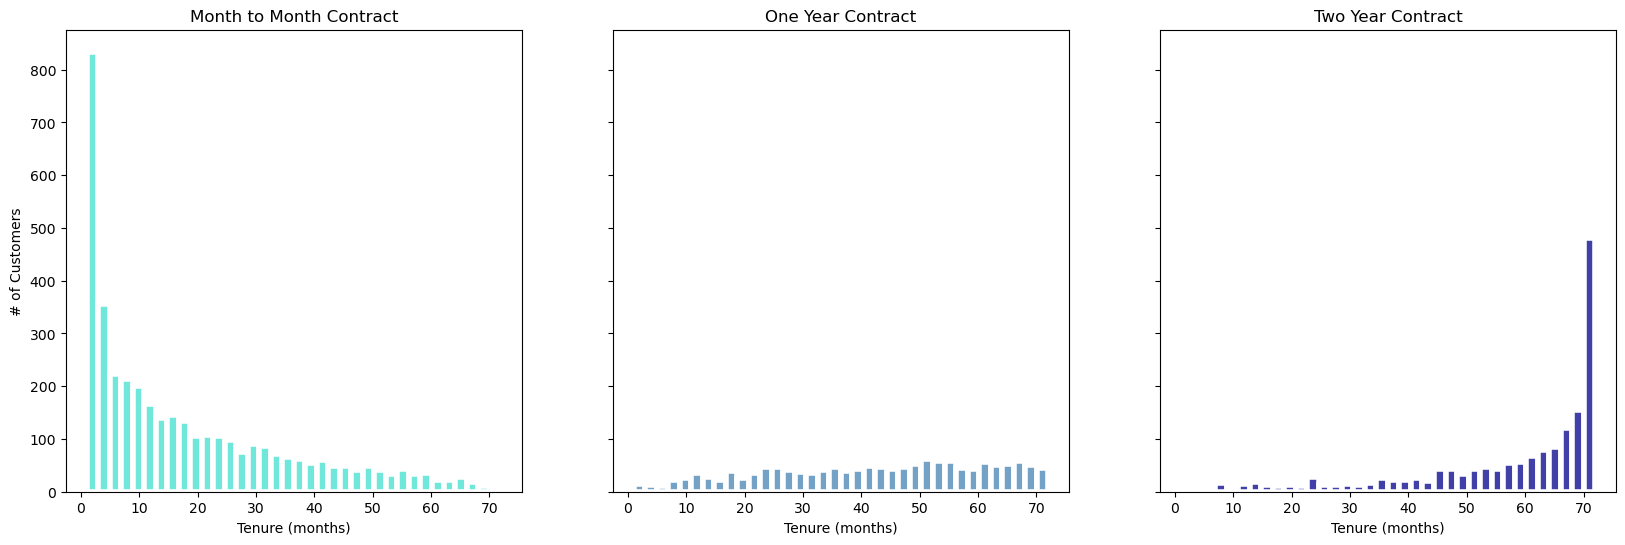

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

sns.histplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
             kde=False, bins=int(180/5), color='turquoise',
             edgecolor='white', linewidth=4, ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

sns.histplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
             kde=False, bins=int(180/5), color='steelblue',
             edgecolor='white', linewidth=4, ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

sns.histplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
             kde=False, bins=int(180/5), color='darkblue',
             edgecolor='white', linewidth=4, ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.show()


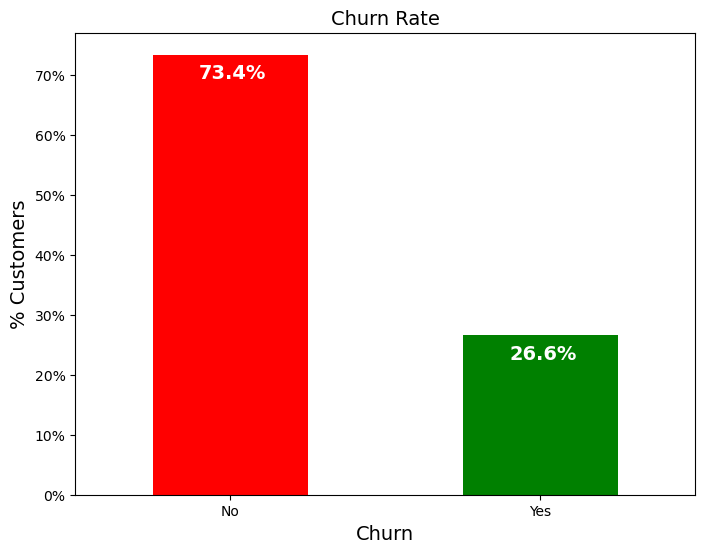

In [21]:
colors = ['red', 'green']
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(kind='bar',
                                                                           stacked=True,
                                                                           rot=0,
                                                                           color=colors,
                                                                           figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            size=14,  # Use 'size' instead of 'fontsize'
            color='white',
            weight='bold')

plt.show()

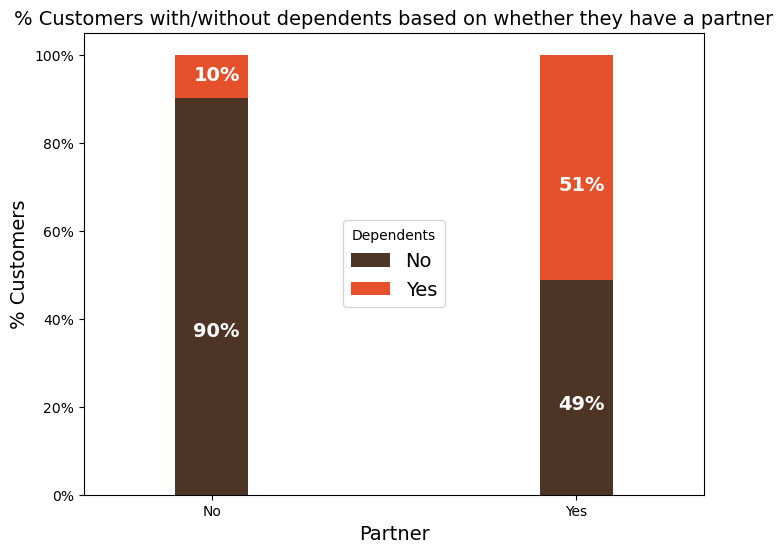

In [22]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

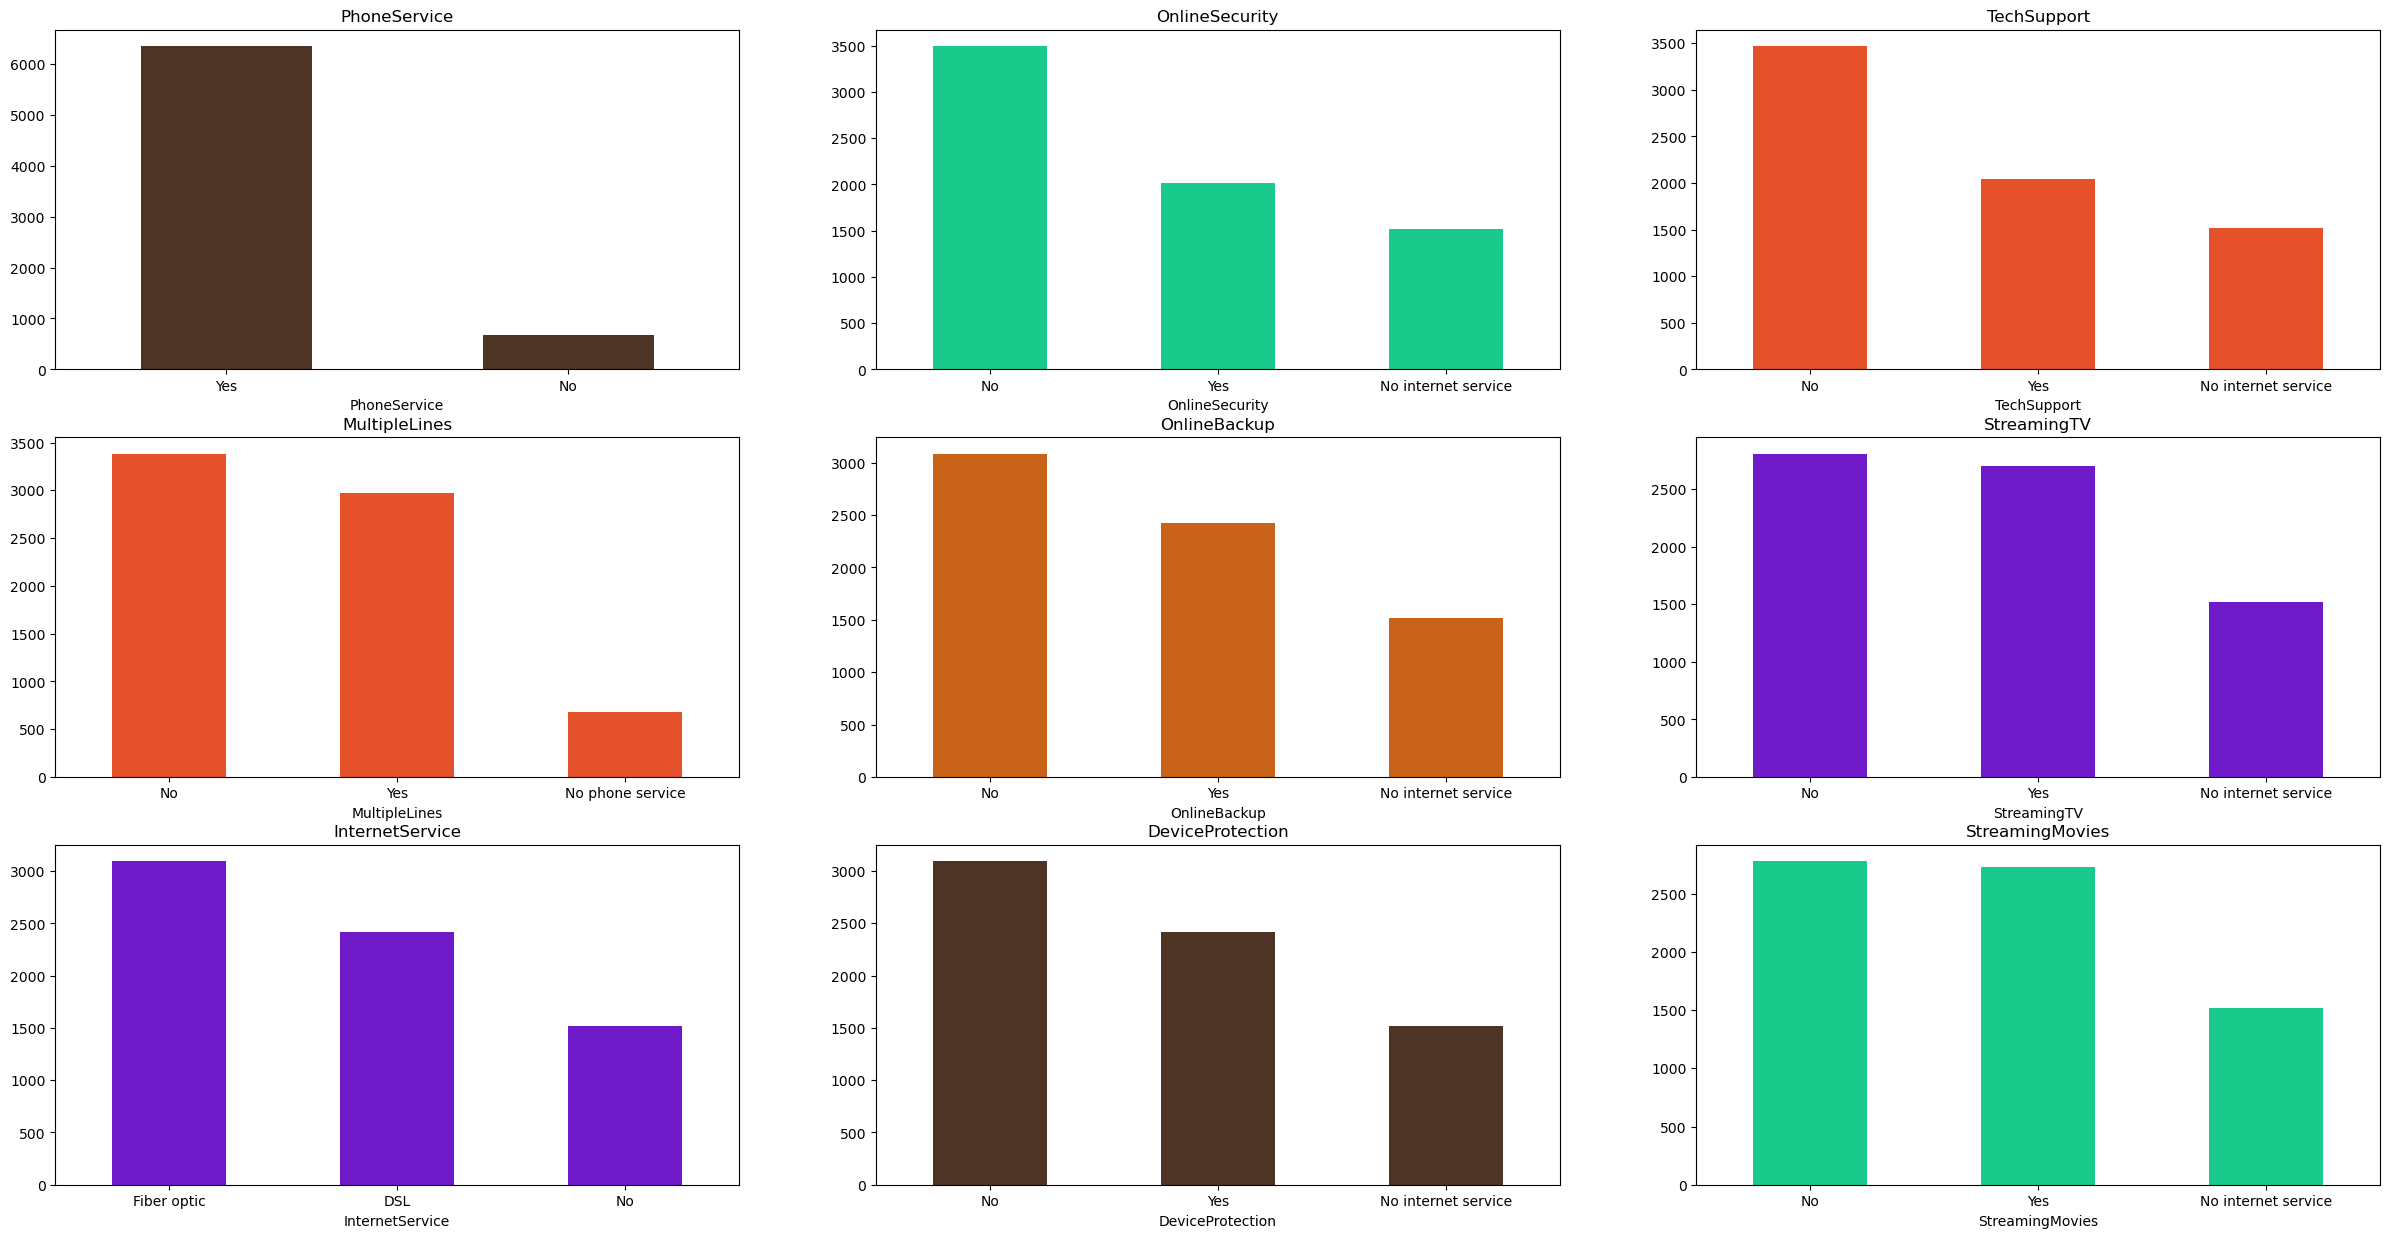

In [44]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
colors = ['#4D3425', '#E4512B', '#6f1ac9', '#1ac98c', '#c9631a', '#4D3425', '#E4512B', '#6f1ac9', '#1ac98c']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))

for i, (item, color) in enumerate(zip(services, colors)):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color=color)

    elif i >= 3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0, color=color)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0, color=color)

    ax.set_title(item)

plt.show()

<Axes: xlabel='Churn', ylabel='tenure'>

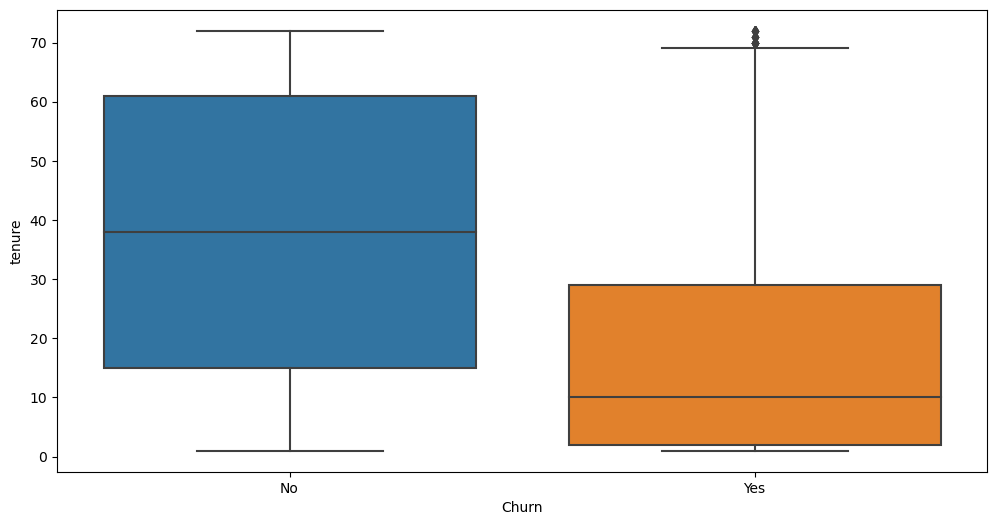

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

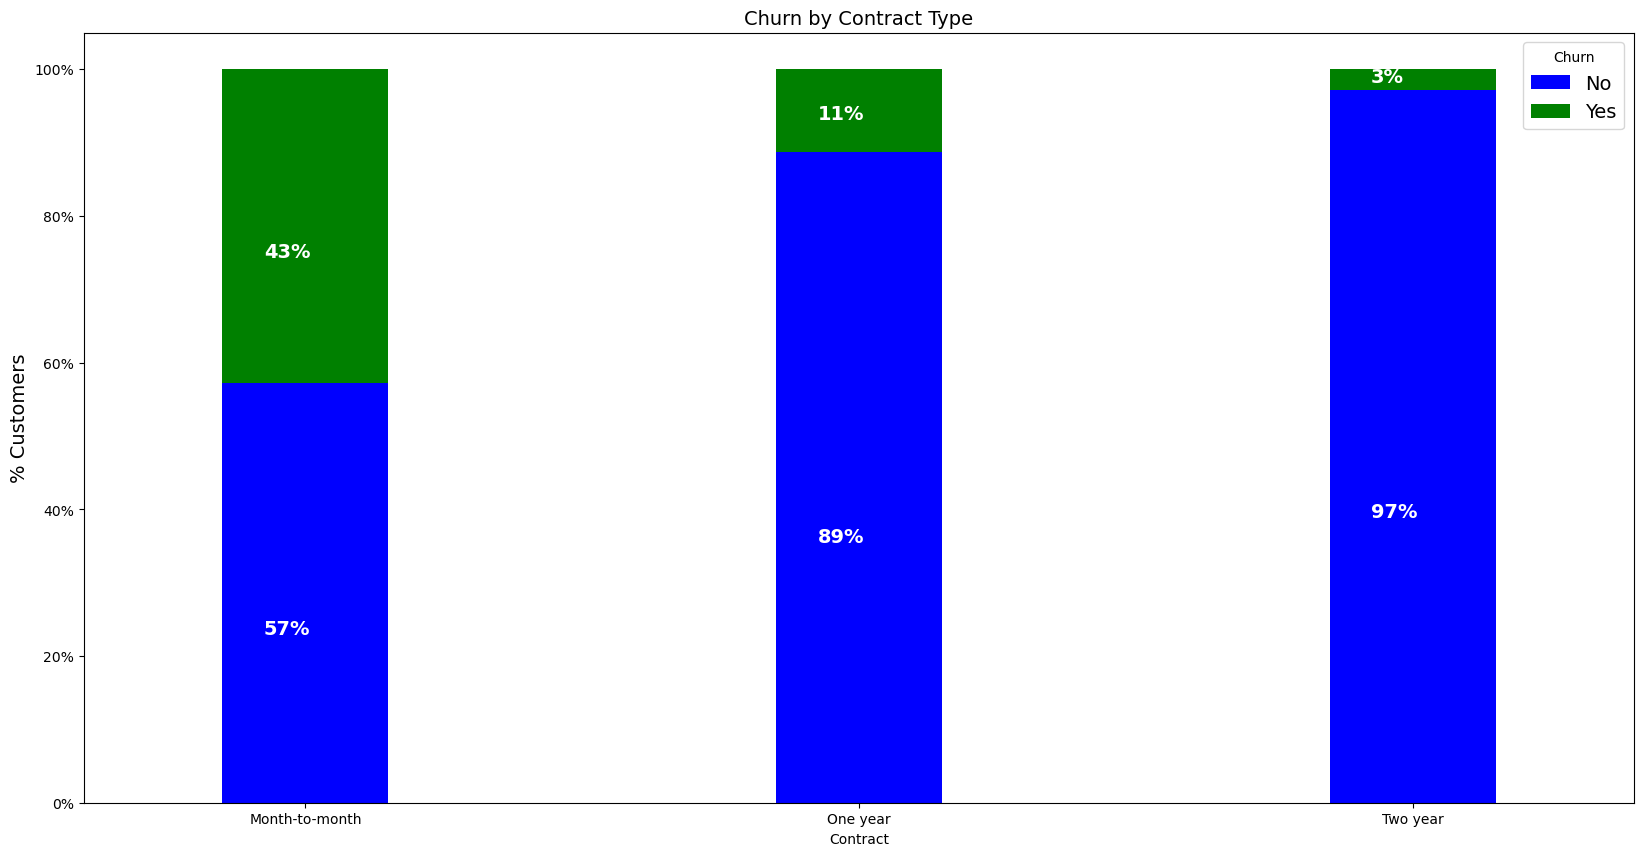

In [25]:
colors = ['blue','green']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (20,10),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

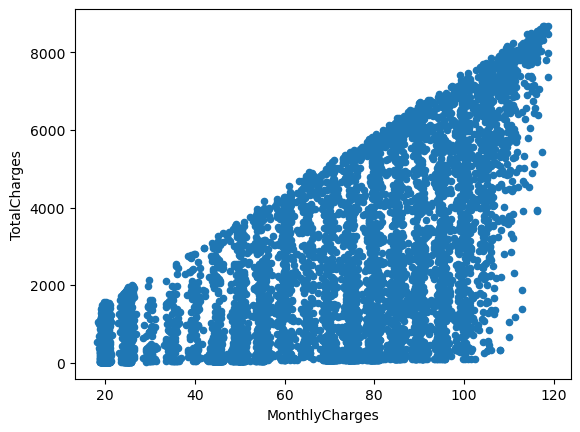

In [26]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

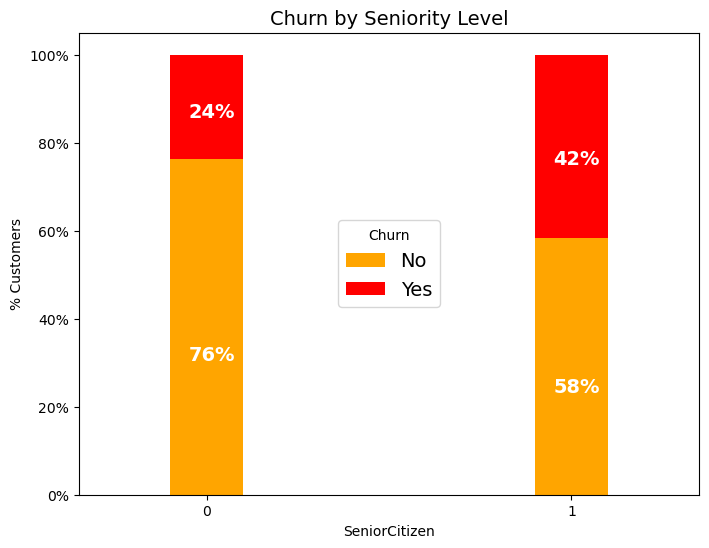

In [27]:
colors = ['Orange','Red']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

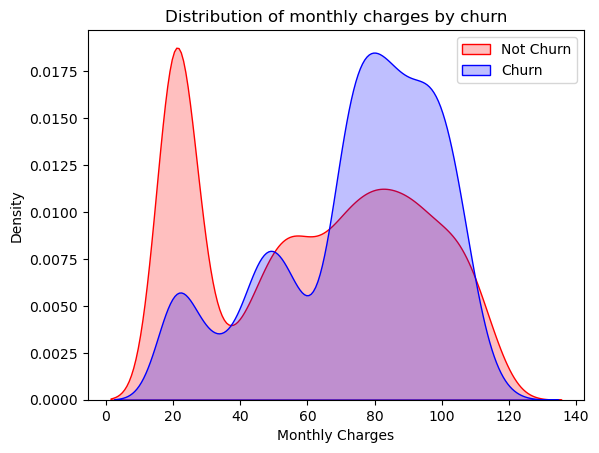

In [28]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", fill=True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


Text(0.5, 1.0, 'Distribution of total charges by churn')

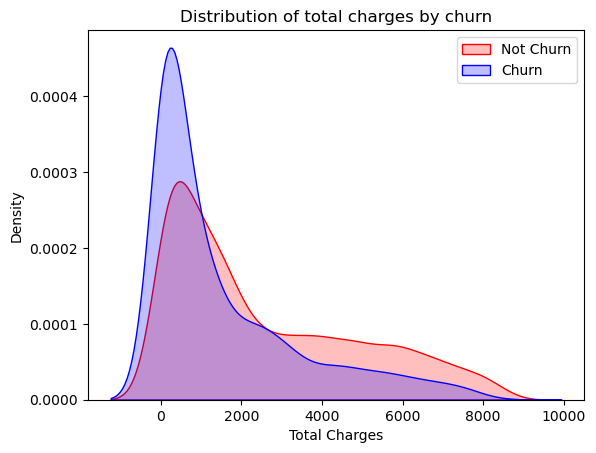

In [29]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", fill=True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')


# Hypothesis evaluation 

### Logistic Regression Accuracy

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
x=df_dummies.drop(columns = ['Churn'])
y=df_dummies['Churn'].values
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x))
x.columns = features

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [33]:
model=LogisticRegression()
result=model.fit(x_train, y_train)

In [34]:
prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


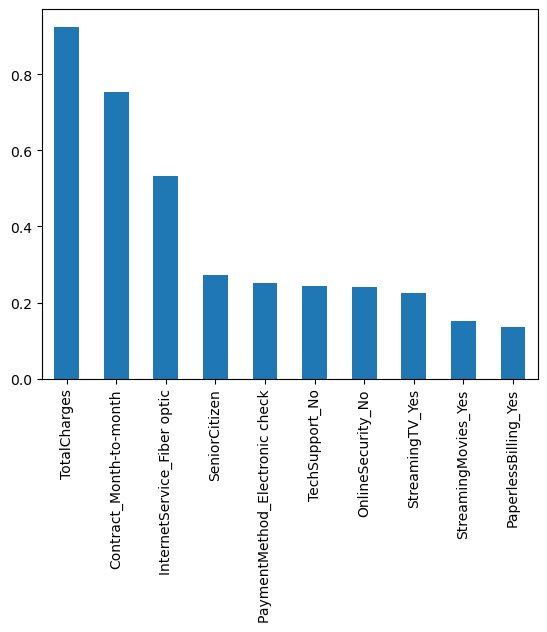

In [35]:
weights = pd.Series(model.coef_[0],
                 index=x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


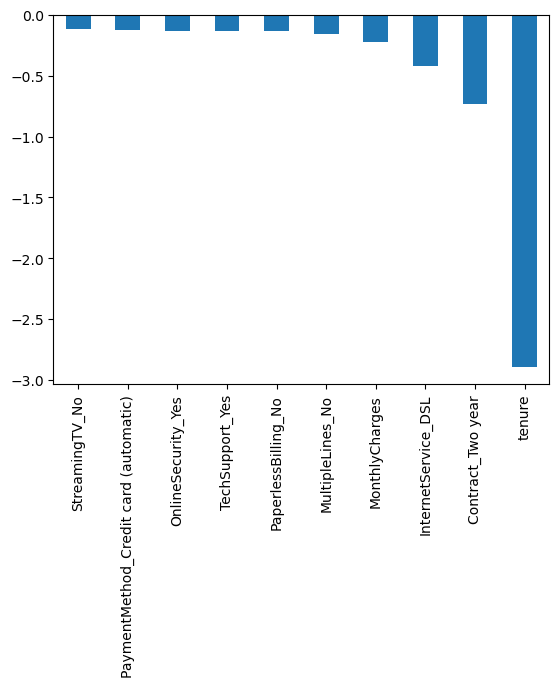

In [36]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))